In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
#Chosen a dataset in CSV format is "world_population.csv"
#Load the CSV file
try:
    df = pd.read_csv('world_population.csv')
    print(df)
except FileNotFoundError:
    print("File not found. Make sure 'world_population.csv' is in your working directory.")
    

     Rank CCA3            Country           Capital Continent  \
0      36  AFG        Afghanistan             Kabul      Asia   
1     138  ALB            Albania            Tirana    Europe   
2      34  DZA            Algeria           Algiers    Africa   
3     213  ASM     American Samoa         Pago Pago   Oceania   
4     203  AND            Andorra  Andorra la Vella    Europe   
..    ...  ...                ...               ...       ...   
229   226  WLF  Wallis and Futuna          Mata-Utu   Oceania   
230   172  ESH     Western Sahara          El Aaiún    Africa   
231    46  YEM              Yemen             Sanaa      Asia   
232    63  ZMB             Zambia            Lusaka    Africa   
233    74  ZWE           Zimbabwe            Harare    Africa   

     2022 Population  2020 Population  2015 Population  2010 Population  \
0         41128771.0       38972230.0       33753499.0       28189672.0   
1          2842321.0        2866849.0        2882481.0        2913399

In [49]:
#Display the first few rows of the dataset using .head() to inspect the data.
df.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225.0,43451666.0,39543154.0,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824.0,77700.0,71746.0,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.5641,1.0100,0.00


In [78]:
#Explore the structure of the dataset by checking the data types and any missing values.
print(df.info(), '\n')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    float64
 6   2020 Population              233 non-null    float64
 7   2015 Population              230 non-null    float64
 8   2010 Population              227 non-null    float64
 9   2000 Population              227 non-null    float64
 10  1990 Population              229 non-null    float64
 11  1980 Population              229 non-null    float64
 12  1970 Population              230 non-null    float64
 13  Area (km²)          

In [58]:
#Clean the dataset by either filling or dropping any missing values.

#filling any missing values
df['2022 Population'] = df['2022 Population'].fillna(df['2022 Population'].mean())

#dropping any missing values
df.dropna()


In [59]:
#Compute the basic statistics of the numerical columns (e.g., mean, median, standard deviation) using .describe()
print(df.describe())

             Rank  2022 Population  2020 Population  2015 Population  \
count  234.000000     2.340000e+02     2.330000e+02     2.300000e+02   
mean   117.500000     3.463225e+07     3.360071e+07     3.206600e+07   
std     67.694165     1.367005e+08     1.358732e+08     1.315071e+08   
min      1.000000     5.100000e+02     5.200000e+02     5.640000e+02   
25%     59.250000     4.676982e+05     4.064710e+05     3.942950e+05   
50%    117.500000     5.973056e+06     5.456681e+06     5.244415e+06   
75%    175.750000     2.615041e+07     2.152263e+07     1.973085e+07   
max    234.000000     1.425887e+09     1.424930e+09     1.393715e+09   

       2010 Population  2000 Population  1990 Population  1980 Population  \
count     2.270000e+02     2.270000e+02     2.290000e+02     2.290000e+02   
mean      3.027016e+07     2.684050e+07     1.933046e+07     1.628288e+07   
std       1.260742e+08     1.133525e+08     8.130962e+07     6.934547e+07   
min       5.960000e+02     6.510000e+02    

In [60]:
print(df.columns)

Index(['Rank', 'CCA3', 'Country', 'Capital', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')


In [66]:
# for example groupby continet and get mean
"""
Compute the basic statistics of the numerical columns (e.g., mean, median, standard deviation) using .describe().
Perform groupings on a categorical column (for example, species, region, or department) and compute the mean of a numerical column for each group.
Identify any patterns or interesting findings from your analysis.
"""
if 'Continent' in df.columns:
    print(df.groupby('Continent')['1970 Population'].mean(),'\n')
    print(df.groupby('Continent')['1970 Population'].median(), '\n')
    print(df.groupby('Continent')['1970 Population'].std(), '\n')
print("Asia has by far the largest mean population in 1970, with approximately 43.8 million")

Continent
Africa           6.567175e+06
Asia             4.383988e+07
Europe           1.311848e+07
North America    7.885865e+06
Oceania          8.469683e+05
South America    1.378194e+07
Name: 1970 Population, dtype: float64 

Continent
Africa           3667394.0
Asia             6212695.0
Europe           4184092.0
North America     135645.0
Oceania            58989.0
South America    5378954.0
Name: 1970 Population, dtype: float64 

Continent
Africa           9.834611e+06
Asia             1.411406e+08
Europe           2.429469e+07
North America    3.235526e+07
Oceania          2.668785e+06
South America    2.498639e+07
Name: 1970 Population, dtype: float64 

Asia has by far the largest mean population in 1970, with approximately 43.8 million


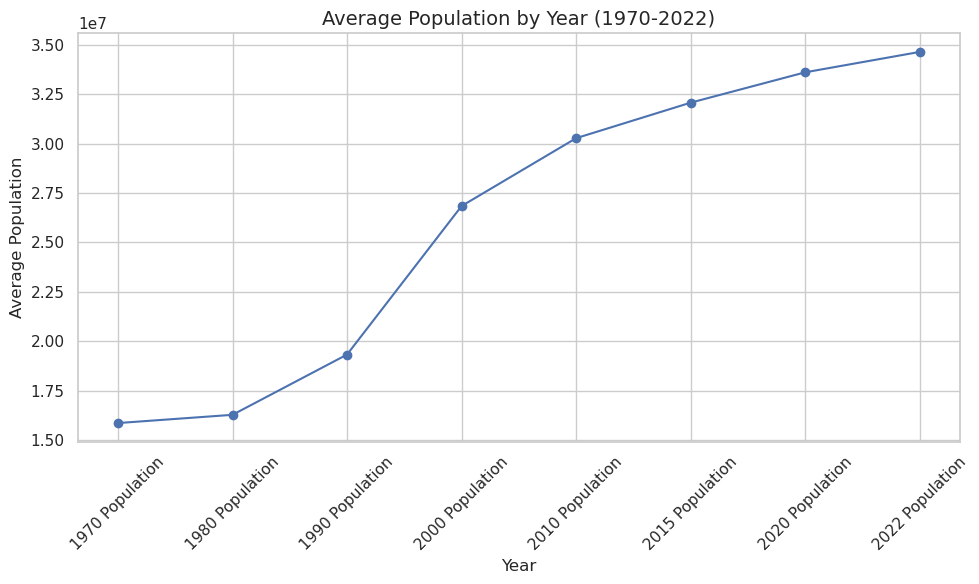

In [69]:
#1 Line chart showing trends over time
# Set up the plotting style
sns.set(style="whitegrid")
years = ['1970 Population', '1980 Population', '1990 Population', '2000 Population', '2010 Population', '2015 Population', '2020 Population', '2022 Population']
df_line = df[years].mean()

plt.figure(figsize=(10, 6))
plt.plot(df_line.index, df_line.values, marker='o', linestyle='-', color='b')
plt.title('Average Population by Year (1970-2022)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Population', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

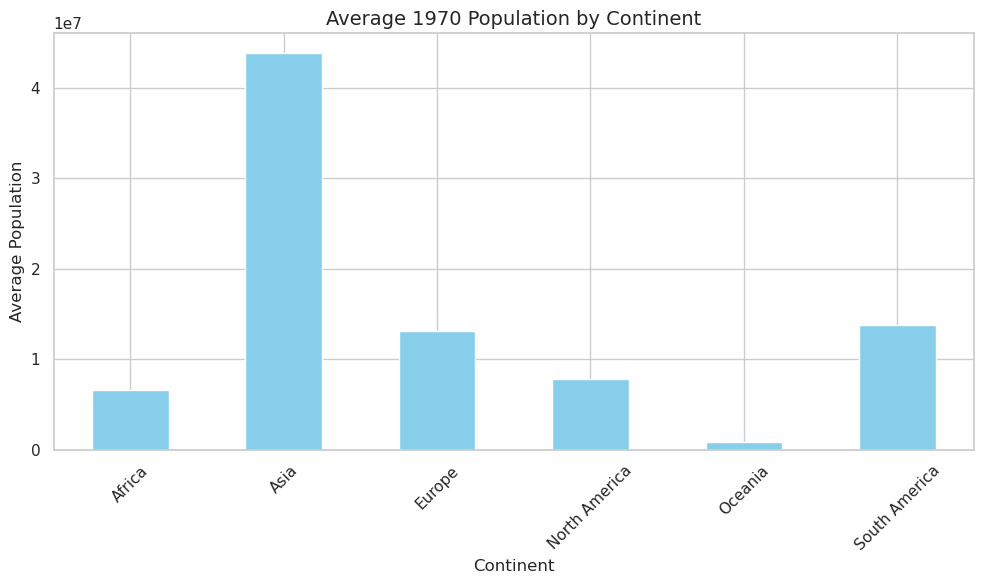

In [70]:
#Bar Chart (Comparison of population across continents in 1970)
continent_population = df.groupby('Continent')['1970 Population'].mean()

plt.figure(figsize=(10, 6))
continent_population.plot(kind='bar', color='skyblue')
plt.title('Average 1970 Population by Continent', fontsize=14)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Average Population', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

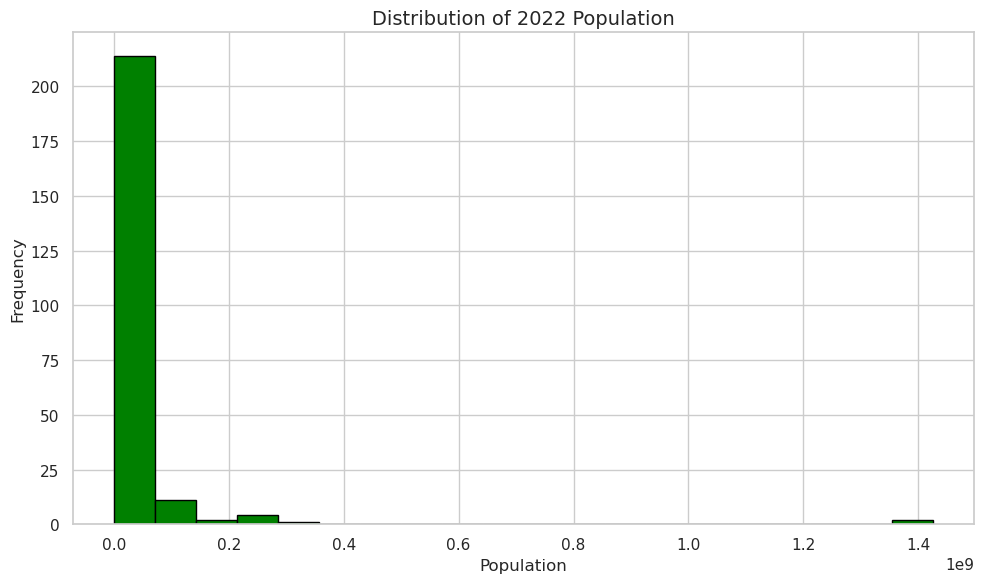

In [74]:
#Histogram (Distribution of 2022 Population)
plt.figure(figsize=(10, 6))
plt.hist(df['2022 Population'].dropna(), bins=20, color='green', edgecolor='black')
plt.title('Distribution of 2022 Population', fontsize=14)
plt.xlabel('Population', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

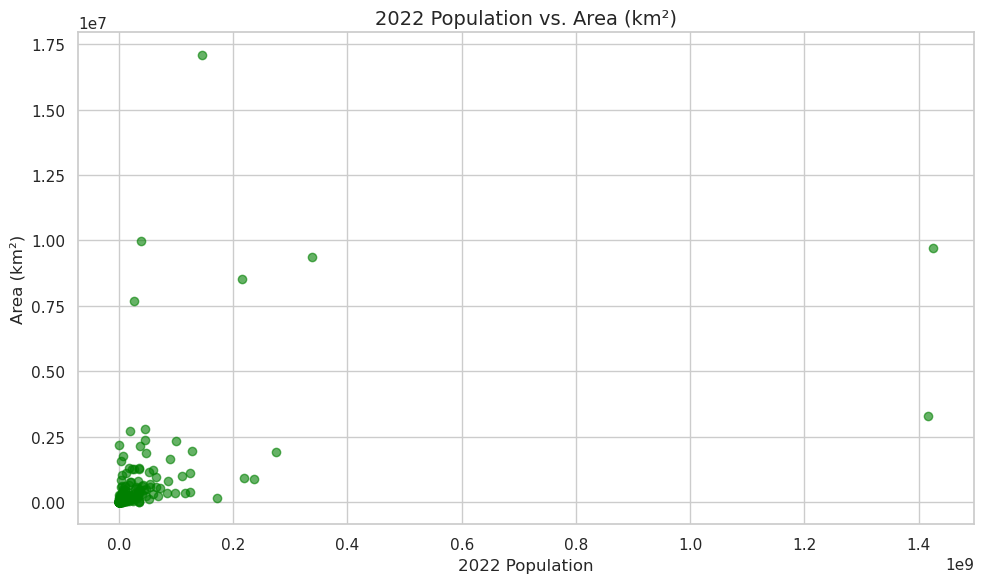

In [76]:
#Scatter Plot (Population vs. Area in 2022)
plt.figure(figsize=(10, 6))
plt.scatter(df['2022 Population'], df['Area (km²)'], color='green', alpha=0.6)
plt.title('2022 Population vs. Area (km²)', fontsize=14)
plt.xlabel('2022 Population', fontsize=12)
plt.ylabel('Area (km²)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [77]:
print("Observations:")
print("- The global population has steadily increased from 1970 to 2022, with noticeable growth over the decades.")
print("- Asia stands out with the highest average population in 1970, reflecting the large populations in countries like China and India.")
print("- Europe and South America have similar average populations in 1970, with a few large countries contributing to their averages.")
print("- Oceania has the smallest average population, likely due to fewer countries with smaller populations.")
print("- The distribution of the 1970 population is right-skewed, indicating that most countries had smaller populations, but a few large countries significantly raise the mean.")
print("- There is no clear correlation between population and area (km²), suggesting that population density varies widely across regions.")
print("- The population growth rate appears to have been significant in regions like Asia and Europe, while regions like Oceania and Africa show slower growth trends.")
print("- The population changes over time show increasing urbanization and industrialization, especially in Asia and North America.")


Observations:
- The global population has steadily increased from 1970 to 2022, with noticeable growth over the decades.
- Asia stands out with the highest average population in 1970, reflecting the large populations in countries like China and India.
- Europe and South America have similar average populations in 1970, with a few large countries contributing to their averages.
- Oceania has the smallest average population, likely due to fewer countries with smaller populations.
- The distribution of the 1970 population is right-skewed, indicating that most countries had smaller populations, but a few large countries significantly raise the mean.
- There is no clear correlation between population and area (km²), suggesting that population density varies widely across regions.
- The population growth rate appears to have been significant in regions like Asia and Europe, while regions like Oceania and Africa show slower growth trends.
- The population changes over time show increasing urb